<a href="https://colab.research.google.com/github/DineshY1011/US_Accident/blob/main/Milestone_1/Week_2/Day_11/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/US_Dataset/US_Accidents_March23.csv'

In [ ]:
df = pd.read_csv(file_path)

1. Distribution of accident severity levels

/tmp/ipython-input-1310841272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette="Set2")


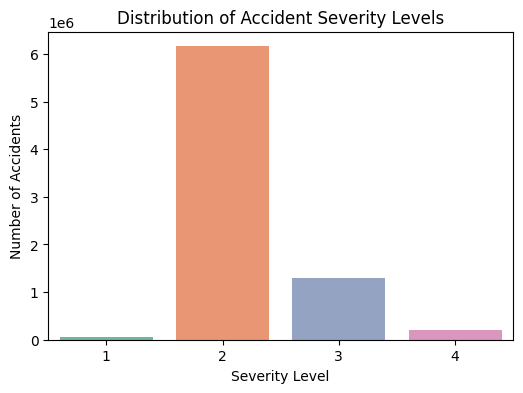

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Severity', data=df, palette="Set2")
plt.title("Distribution of Accident Severity Levels")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()

2. Accident frequency by hour of the day

/tmp/ipython-input-2552491425.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette="coolwarm")


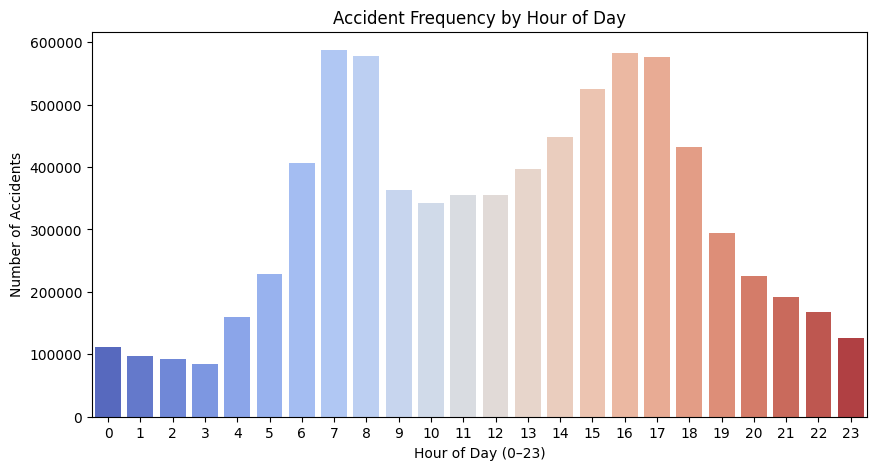

In [ ]:
# Parse Start_Time safely
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')

# Extract hour
df['Hour'] = df['Start_Time'].dt.hour

# Drop rows where Start_Time couldn't be parsed
df = df.dropna(subset=['Hour'])

# Plot
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df, palette="coolwarm")
plt.title("Accident Frequency by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Accidents")
plt.show()

3. Accidents by day of the week

/tmp/ipython-input-3477756907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, order=order, palette="muted")


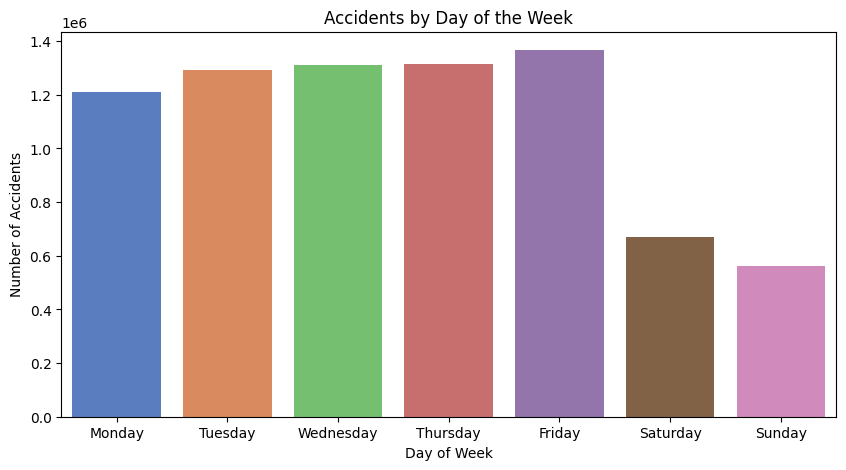

In [ ]:
# Extract day of week
df['DayOfWeek'] = pd.to_datetime(df['Start_Time']).dt.day_name()

plt.figure(figsize=(10,5))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(x='DayOfWeek', data=df, order=order, palette="muted")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.show()

4. Most common weather conditions during accidents

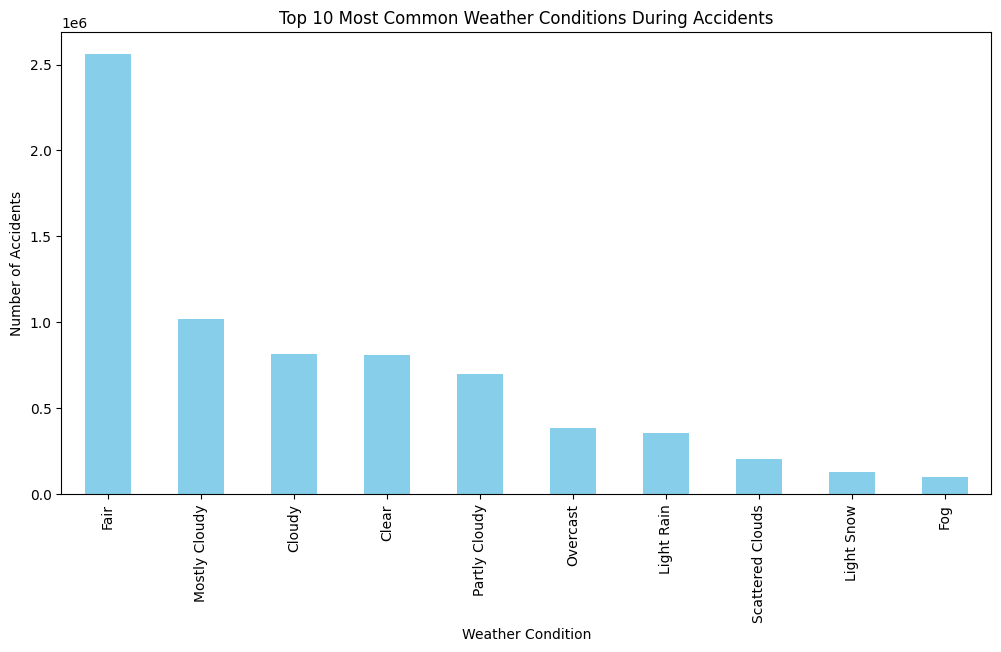

In [ ]:
plt.figure(figsize=(12,6))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()

5. Identify missing data and percentage

In [ ]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({"Missing Values": missing_data, "Percentage": missing_percent})
missing_summary = missing_summary[missing_summary["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)

print(missing_summary)

                       Missing Values  Percentage
End_Lat                       3402762   44.029355
End_Lng                       3402762   44.029355
Precipitation(in)             2203586   28.512858
Wind_Chill(F)                 1999019   25.865904
Wind_Speed(mph)                571233    7.391355
Visibility(mi)                 177098    2.291524
Wind_Direction                 175206    2.267043
Humidity(%)                    174144    2.253301
Weather_Condition              173459    2.244438
Temperature(F)                 163853    2.120143
Pressure(in)                   140679    1.820288
Weather_Timestamp              120228    1.555666
Sunrise_Sunset                  23246    0.300787
Civil_Twilight                  23246    0.300787
Nautical_Twilight               23246    0.300787
Astronomical_Twilight           23246    0.300787
Airport_Code                    22635    0.292881
Street                          10869    0.140637
Timezone                         7808    0.101030


6. Impute missing numerical values with median


In [ ]:
from sklearn.impute import SimpleImputer

# Example: impute 'Temperature(F)' column
imputer = SimpleImputer(strategy='median')
df['Temperature(F)'] = imputer.fit_transform(df[['Temperature(F)']])
df['Temperature(F)'].head()

,Temperature(F)
0,36.9
1,37.9
2,36.0
3,35.1
4,36.0


8. Label encode a categorical column

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Choose a categorical column, e.g., Weather_Condition
le = LabelEncoder()

# Convert text to numbers
df['Weather_Condition_encoded'] = le.fit_transform(df['Weather_Condition'].astype(str))

# Show first 5 rows
print(df[['Weather_Condition', 'Weather_Condition_encoded']].head())

  Weather_Condition  Weather_Condition_encoded
0        Light Rain                         62
1        Light Rain                         62
2          Overcast                         88
3     Mostly Cloudy                         85
4     Mostly Cloudy                         85


9.How to one-hot encode a categorical column?

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Weather_Condition'], drop_first=True)
print(df_encoded.head())

    ID   Source  Severity          Start_Time             End_Time  Start_Lat  \
0  A-1  Source2         3 2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147   
1  A-2  Source2         2 2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059   
2  A-3  Source2         2 2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148   
3  A-4  Source2         3 2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753   
4  A-5  Source2         2 2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781   

   Start_Lng  End_Lat  End_Lng  Distance(mi)  ...  \
0 -84.058723      NaN      NaN          0.01  ...   
1 -82.831184      NaN      NaN          0.01  ...   
2 -84.032608      NaN      NaN          0.01  ...   
3 -84.205582      NaN      NaN          0.01  ...   
4 -84.188354      NaN      NaN          0.01  ...   

  Weather_Condition_Thunder in the Vicinity Weather_Condition_Thunderstorm  \
0                                     False                          False   
1                                     